In [95]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

covid_df = pd.read_csv("covid_19_data.csv")
line_list = pd.read_csv("COVID19_line_list_data.csv")
open_line = pd.read_csv("COVID19_open_line_list.csv")

In [2]:
covid_df = covid_df.drop(["SNo", "Last Update"], axis=1)
covid_df.head()

,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered
0,01/22/2020,Anhui,Mainland China,1.0,0.0,0.0
1,01/22/2020,Beijing,Mainland China,14.0,0.0,0.0
2,01/22/2020,Chongqing,Mainland China,6.0,0.0,0.0
3,01/22/2020,Fujian,Mainland China,1.0,0.0,0.0
4,01/22/2020,Gansu,Mainland China,0.0,0.0,0.0


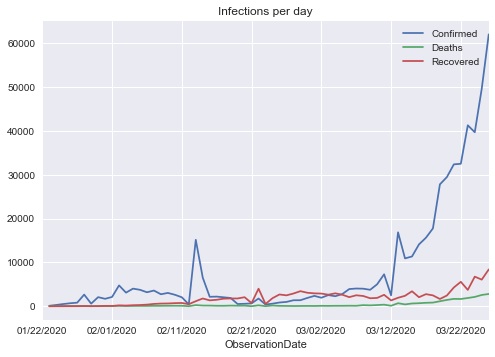

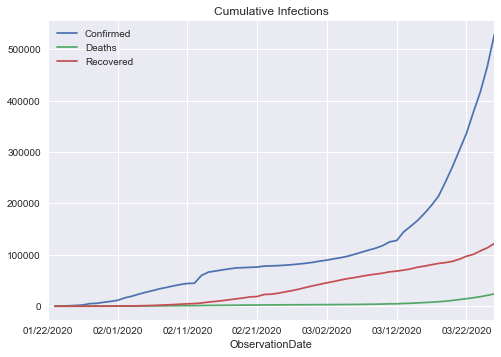

In [3]:
# Trend of infections
series = covid_df.groupby("ObservationDate").sum().diff()
series.plot()
plt.title("Infections per day")
plt.show()

# Cumulative infections
series.cumsum().plot()
plt.title("Cumulative Infections")
plt.show()

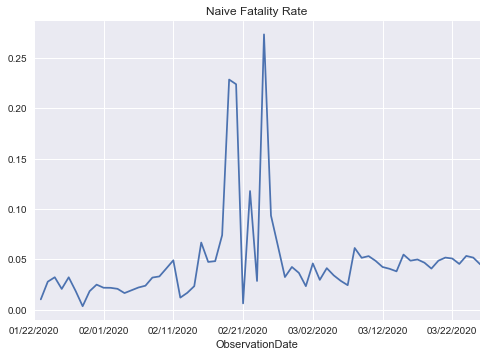

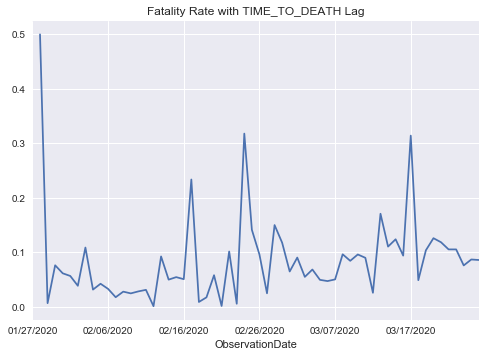

In [4]:
TIME_TO_DEATH=5
# Naive deaths / confirmed
(series['Deaths'] / series['Confirmed']).plot()
plt.title("Naive Fatality Rate")
plt.show()

# Deaths / Confirmed with TIME_TO_DEATH lag
(series['Deaths'] / series['Confirmed'].shift(TIME_TO_DEATH)).iloc[TIME_TO_DEATH:].plot()
plt.title("Fatality Rate with TIME_TO_DEATH Lag")
plt.show()

In [100]:
countries_ = covid_df.groupby("Country/Region").max().sort_values("Confirmed").iloc[-10:]
countries = covid_df.groupby("Province/State").max().groupby("Country/Region").sum().sort_values("Confirmed").iloc[-10:]

In [101]:
countries = pd.merge(countries, countries_, left_index=True, right_index=True, how="outer")
countries['Confirmed'] = countries[['Confirmed_x', 'Confirmed_y']].max(axis=1)
countries['Deaths'] = countries[['Deaths_x', 'Deaths_y']].max(axis=1)
countries['Recovered'] = countries[['Recovered_x', 'Recovered_y']].max(axis=1)
countries = countries[["Confirmed", "Deaths", "Recovered"]].sort_values("Confirmed").iloc[-10:]

In [102]:
countries

,Confirmed,Deaths,Recovered
Country/Region,,,
South Korea,9241.0,131.0,4144.0
UK,11658.0,578.0,135.0
Switzerland,11811.0,191.0,131.0
Iran,29406.0,2234.0,10457.0
France,34527.0,1696.0,4948.0
Germany,43938.0,267.0,5673.0
Spain,57786.0,4365.0,7015.0
Italy,80589.0,8215.0,10361.0
Mainland China,81299.0,3287.0,74061.0


In [115]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
open_line.groupby("sex")['ID'].count()

sex
4000        0
Female      5
Male        4
female    551
male      703
Name: ID, dtype: int64